# Task I: Quantum Computing Part 
## 1. Implement a simple quantum operation with Cirq or Pennylane
<ol> 
    <li> With 5 qubits 
    <li> Apply Hadamard operation on every qubit 
    <li> Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4) 
    <li> SWAP (0, 4) 
    <li> Rotate X with pi/2 on any qubit 
    <li> Plot the circuit 
</ol>
<hr>

## 2. Implement a second circuit with a framework of your choice:
<ol>
    <li> Apply a Hadmard gate to the first qubit
    <li> Rotate the second qubit by pi/3 around X
    <li> Apply Hadamard gate to the third and fourth qubit
    <li> Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4>
</ol>
<hr>

In [18]:
import cirq

In [2]:
# Using named qubits can be useful for abstract algorithms
# as well as algorithms not yet mapped onto hardware.
q0 = cirq.NamedQubit('source')
q1 = cirq.NamedQubit('target')

# Line qubits can be created individually
q3 = cirq.LineQubit(3)

# Or created in a range
# This will create LineQubit(0), LineQubit(1), LineQubit(2)
q0, q1, q2 = cirq.LineQubit.range(3)

# Grid Qubits can also be referenced individually
q4_5 = cirq.GridQubit(4, 5)

# Or created in bulk in a square
# This will create 16 qubits from (0,0) to (3,3)
qubits = cirq.GridQubit.square(4)

In [5]:
# Example gates
cnot_gate = cirq.CNOT
pauli_z = cirq.Z

# Use exponentiation to get square root gates.
sqrt_x_gate = cirq.X**0.5

# Some gates can also take parameters
sqrt_sqrt_y = cirq.YPowGate(exponent=0.25)

# Create two qubits at once, in a line.
q0, q1 = cirq.LineQubit.range(2)

# Example operations
z_op = cirq.Z(q0)
not_op = cirq.CNOT(q0, q1)
sqrt_iswap_op = cirq.SQRT_ISWAP(q0, q1)

# You can also use the gates you specified earlier.
cnot_op = cnot_gate(q0, q1)
pauli_z_op = pauli_z(q0)
sqrt_x_op = sqrt_x_gate(q0)
sqrt_sqrt_y_op = sqrt_sqrt_y(q0)

In [6]:
circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(3)
circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.H(qubits[1]))
circuit.append(cirq.H(qubits[2]))
print(circuit)

0: ───H───

1: ───H───

2: ───H───


0: ───H───@──────────────────────×───
          │                      │
1: ───H───X───@──────────────────┼───
              │                  │
2: ───H───────X───@───Rx(0.5π)───┼───
                  │              │
3: ───H───────────X───@──────────┼───
                      │          │
4: ───H───────────────X──────────×───
measurements: (no measurements)

qubits: (cirq.LineQubit(4), cirq.LineQubit(1), cirq.LineQubit(2), cirq.LineQubit(3), cirq.LineQubit(0))
output vector: [0.12499999-0.12499999j 0.12499999-0.12499999j 0.12499999-0.12499999j
 0.12499999-0.12499999j 0.12499999-0.12499999j 0.12499999-0.12499999j
 0.12499999-0.12499999j 0.12499999-0.12499999j 0.12499999-0.12499999j
 0.12499999-0.12499999j 0.12499999-0.12499999j 0.12499999-0.12499999j
 0.12499999-0.12499999j 0.12499999-0.12499999j 0.12499999-0.12499999j
 0.12499999-0.12499999j 0.12499999-0.12499999j 0.12499999-0.12499999j
 0.12499999-0.12499999j 0.12499999-0.12499999j 0.12499999-0.12499999j
 0.12499999-0.12499999j 0.12

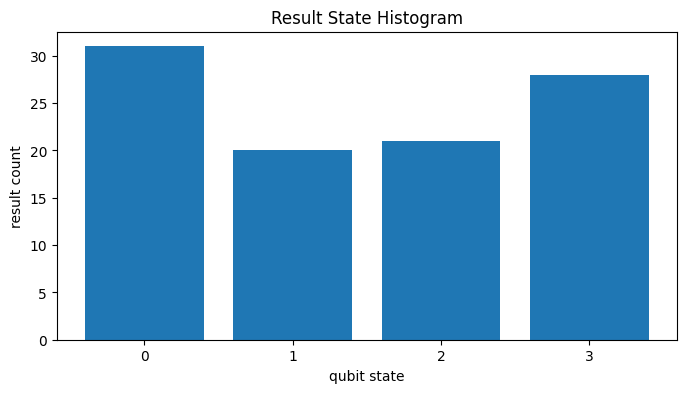

In [13]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

# Create 5 qubits
qubits = [cirq.LineQubit(i) for i in range(5)]

# Define the circuit
circuit = cirq.Circuit()

# Apply Hadamard gate to each qubit
circuit.append(cirq.H(q) for q in qubits)

# Apply CNOT gates
circuit.append(cirq.CNOT(qubits[i], qubits[i + 1]) for i in range(4))

# Apply SWAP between qubit 0 and 4
circuit.append(cirq.SWAP(qubits[0], qubits[4]))

# Apply Rx(pi/2) to qubit 2 (arbitrarily chosen)
circuit.append(cirq.rx(np.pi / 2)(qubits[2]))

# Print the circuit
print(circuit)

s = cirq.Simulator()
results = s.simulate(circuit)
print (results)
circuit.append(cirq.measure(q0, q1, key='result'))
samples = s.run(circuit, repetitions=100)

# Plot the circuit
cirq.CircuitDiagramInfo(circuit)
fig, ax = plt.subplots(figsize=(8, 4))
cirq.plot_state_histogram(samples, plt.subplot())
plt.show()


test00: ───X───
measurements: (no measurements)

qubits: (cirq.NamedQubit('test00'),)
output vector: |1⟩

phase:
output vector: |⟩


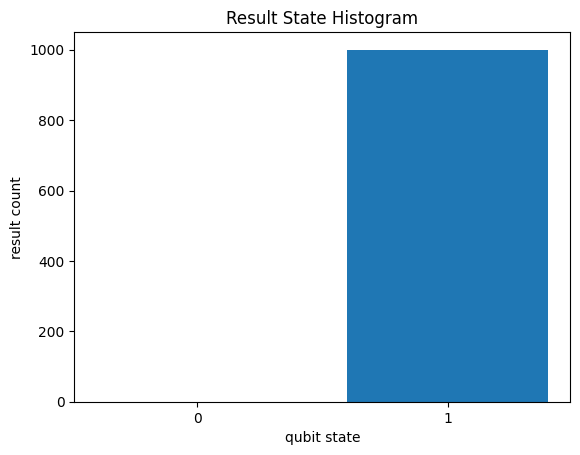

In [28]:
# Implementation of NOT Gate (Pauli's gate)

q0 = cirq.NamedQubit("test00")

circuit00 = cirq.Circuit()
circuit00.append(cirq.X(q0))
# circuit00.append(cirq.X(q0))
print (circuit00)

sim00 = cirq.Simulator()
results00 = sim00.simulate(circuit00)
print (results00)
circuit00.append(cirq.measure(q0, key="result"))

samples00 = sim00.run(circuit00, repetitions=1000)

cirq.plot_state_histogram(samples00, plt.subplot())
plt.show()

test01: ───H───
measurements: (no measurements)

qubits: (cirq.NamedQubit('test01'),)
output vector: 0.707|0⟩ + 0.707|1⟩

phase:
output vector: |⟩


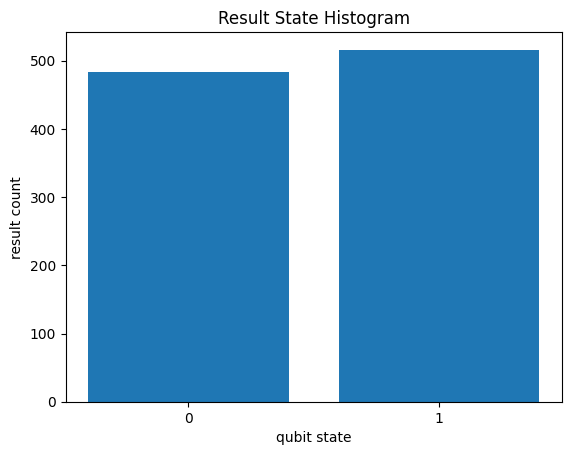

In [27]:
# Implementation of Hadaman Gate

q0 = cirq.NamedQubit("test01")

circuit01 = cirq.Circuit()
circuit01.append(cirq.H(q0))
# circuit01.append(cirq.H(q0))

print (circuit01)

sim01 = cirq.Simulator()
results01 = sim01.simulate(circuit01)
print (results01)
circuit01.append(cirq.measure(q0, key="result"))

samples01 = sim01.run(circuit01, repetitions=1000)

cirq.plot_state_histogram(samples01, plt.subplot())
plt.show()

test01: ───H───H───
measurements: (no measurements)

qubits: (cirq.NamedQubit('test01'),)
output vector: |0⟩

phase:
output vector: |⟩


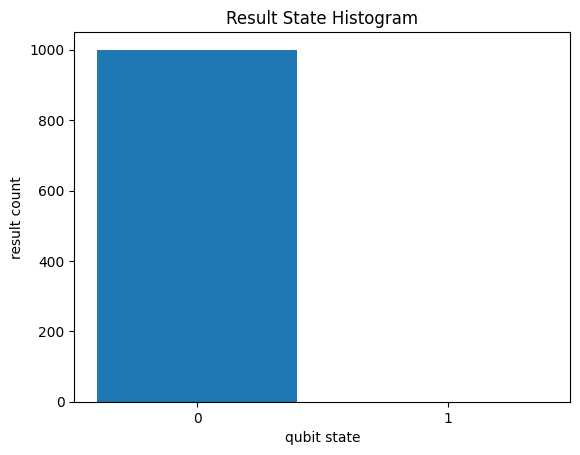

In [ ]:
# Implementation of Hadaman Gate
# Applying 2 Hadaman Gates returns the bit to the origianl state

q0 = cirq.NamedQubit("test01")

circuit01 = cirq.Circuit()
circuit01.append(cirq.H(q0))
circuit01.append(cirq.H(q0))

print (circuit01)

sim01 = cirq.Simulator()
results01 = sim01.simulate(circuit01)
print (results01)
circuit01.append(cirq.measure(q0, key="result"))

samples01 = sim01.run(circuit01, repetitions=1000)

cirq.plot_state_histogram(samples01, plt.subplot())
plt.show()

test00: ───X───Z───

test01: ───Z───────
measurements: (no measurements)

qubits: (cirq.NamedQubit('test00'),)
output vector: -1|1⟩

qubits: (cirq.NamedQubit('test01'),)
output vector: |0⟩

phase:
output vector: |⟩


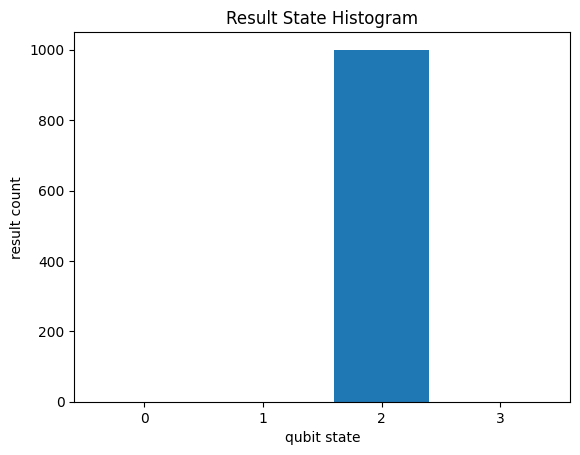

In [ ]:
# Implementation of Z Gate, seeing the -1|1> state

q0 = cirq.NamedQubit("test00")
q1 = cirq.NamedQubit("test01")

circuit02 = cirq.Circuit()

# circuit02.append(cirq.X(q0))
circuit02.append(cirq.Z(q0))
circuit02.append(cirq.X(q1))
circuit02.append(cirq.Z(q1))

print (circuit02)

sim02 = cirq.Simulator()
results02 = sim02.simulate(circuit02)
print (results02)
circuit02.append(cirq.measure(q0, q1, key="result"))


samples02 = sim02.run(circuit02, repetitions=1000)
# print (samples02)

cirq.plot_state_histogram(samples02, plt.subplot())
plt.show()

In [ ]:
# Implementing a Bell Circuit 

